In [1]:
! pip install pandas numpy seaborn matplotlib scikit-learn imbalanced-learn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [14]:
# Load the Glass dataset
try:
    df = pd.read_excel(r'C:\Users\hp\Downloads\Random Forest\Random Forest\glass.xlsx',sheet_name='glass')
    print("Glass dataset loaded successfully.")
except FileNotFoundError:
    print("Error: glass.csv not found. Please make sure the file is in the correct directory.")
    exit()

Glass dataset loaded successfully.


In [15]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [16]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [17]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
209    False
210    False
211    False
212    False
213    False
Length: 214, dtype: bool

In [18]:
numerical_features = df.select_dtypes(include=np.number).columns.tolist()

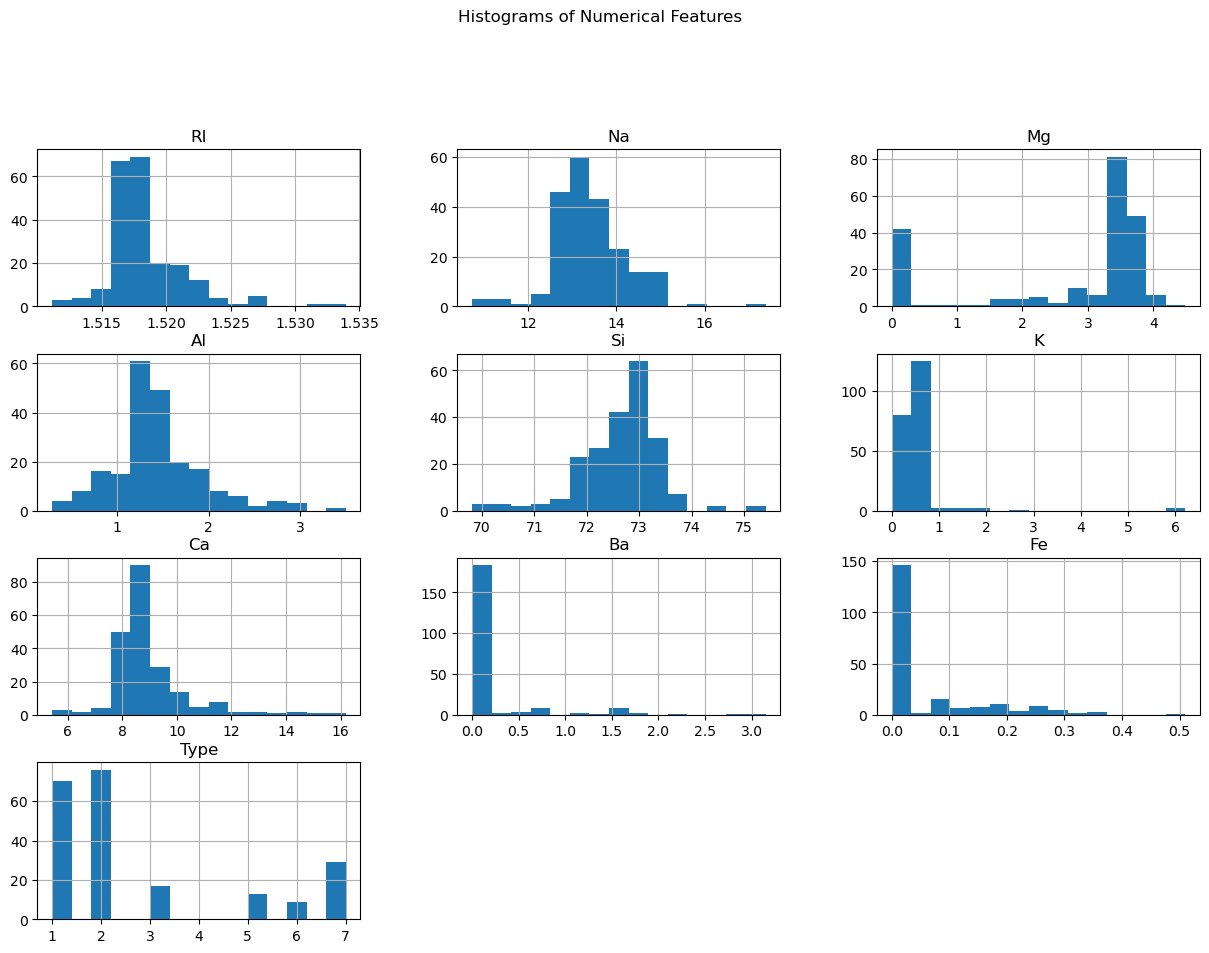

In [19]:
df.hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.show()

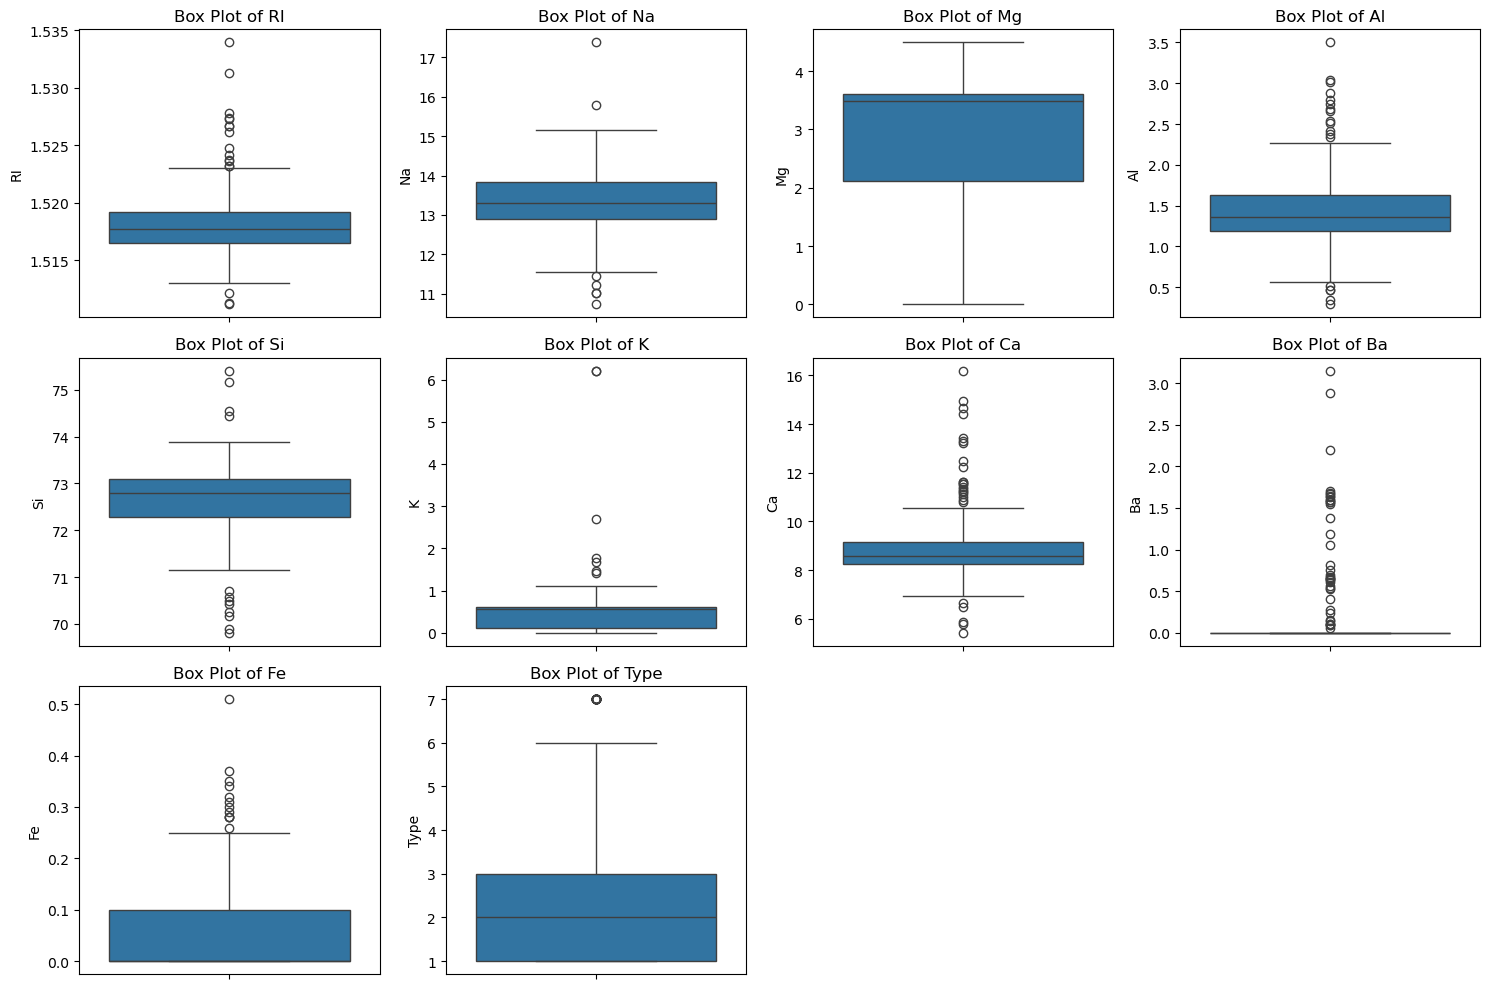

In [20]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

In [22]:
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Filter out the rows with outliers
df_no_outliers = df[~((df[numerical_features] < (Q1 - 1.5 * IQR)) | 
                      (df[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

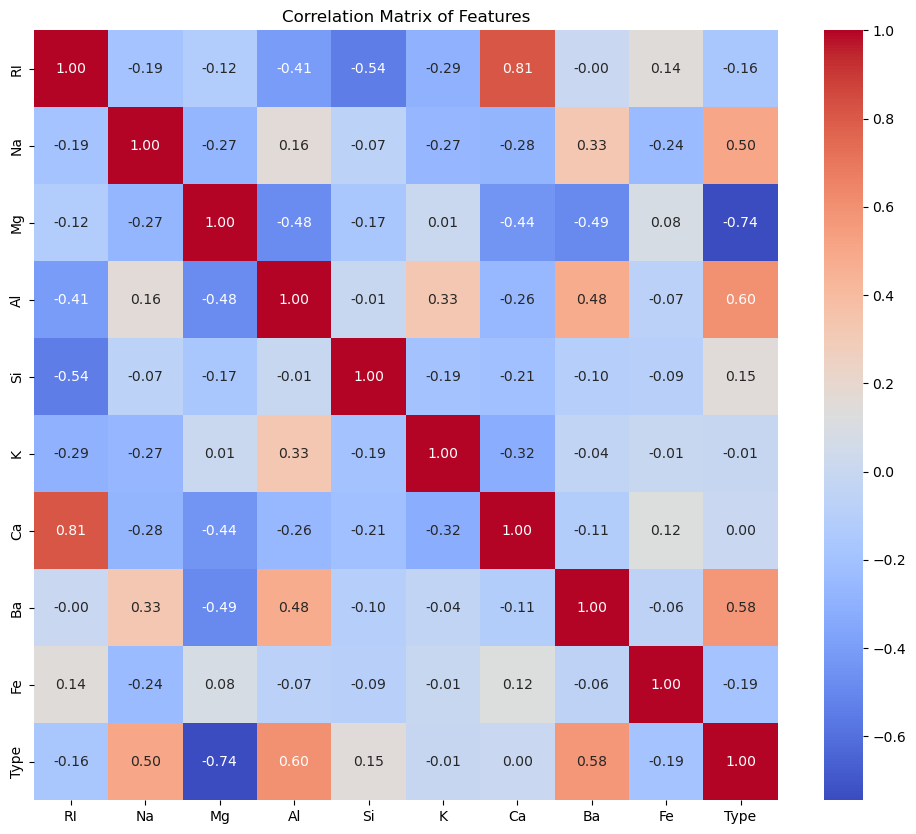

In [23]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [24]:
# 3.3 Feature Scaling
X = df.drop('Type', axis=1)
y = df['Type']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("\nScaled features:")
print(X_scaled_df.head())


Scaled features:
         RI        Na        Mg        Al        Si         K        Ca  \
0  0.872868  0.284953  1.254639 -0.692442 -1.127082 -0.671705 -0.145766   
1 -0.249333  0.591817  0.636168 -0.170460  0.102319 -0.026213 -0.793734   
2 -0.721318  0.149933  0.601422  0.190912  0.438787 -0.164533 -0.828949   
3 -0.232831 -0.242853  0.698710 -0.310994 -0.052974  0.112107 -0.519052   
4 -0.312045 -0.169205  0.650066 -0.411375  0.555256  0.081369 -0.624699   

         Ba        Fe  
0 -0.352877 -0.586451  
1 -0.352877 -0.586451  
2 -0.352877 -0.586451  
3 -0.352877 -0.586451  
4 -0.352877 -0.586451  



Handling Imbalanced Data using SMOTE:

Class distribution after SMOTE:
Type
1    76
2    76
3    76
5    76
6    76
7    76
Name: count, dtype: int64


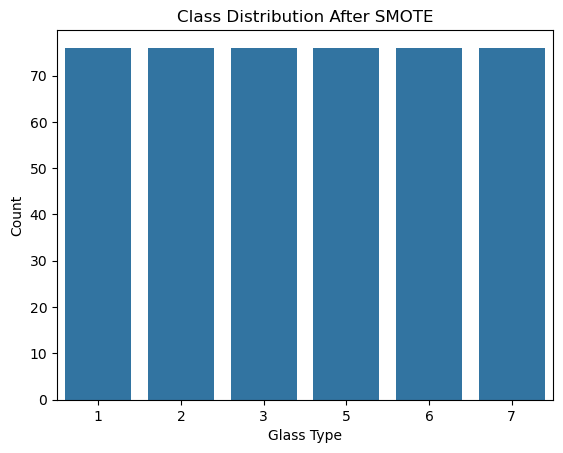

In [25]:
# 3.4 Handling Imbalanced Data
print("\nHandling Imbalanced Data using SMOTE:")
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)
print("\nClass distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())
sns.countplot(x=y_resampled)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Glass Type')
plt.ylabel('Count')
plt.show()

In [26]:
# 4. Random Forest Model Implementation
print("\n--- 4. Random Forest Model Implementation ---")
# 4.1 Divide Data into Train and Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
print("\nShape of training data:", X_train.shape, y_train.shape)
print("Shape of testing data:", X_test.shape, y_test.shape)


--- 4. Random Forest Model Implementation ---

Shape of training data: (319, 9) (319,)
Shape of testing data: (137, 9) (137,)


In [27]:
# 4.2 Implement and Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)


Random Forest Classifier Performance:
Accuracy: 0.8540145985401459

Classification Report:
              precision    recall  f1-score   support

           1       0.81      0.57      0.67        30
           2       0.76      0.76      0.76        25
           3       0.61      1.00      0.76        14
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        23
           7       0.96      0.96      0.96        28

    accuracy                           0.85       137
   macro avg       0.86      0.88      0.86       137
weighted avg       0.87      0.85      0.85       137


Confusion Matrix:


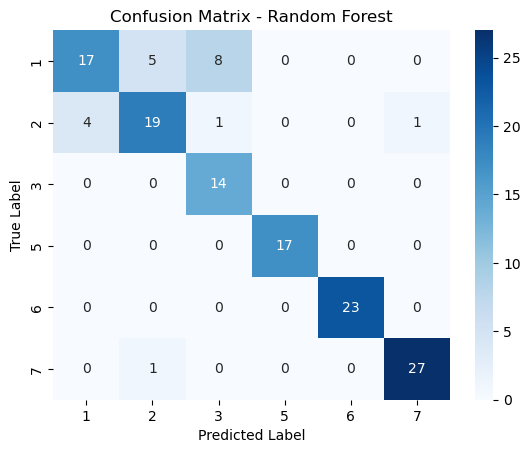

In [28]:
# 4.3 Evaluate the performance
y_pred_rf = rf_classifier.predict(X_test)
print("\nRandom Forest Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



--- 5. Bagging and Boosting Methods ---

Bagging Classifier Performance:
Accuracy: 0.8832116788321168

Classification Report:
              precision    recall  f1-score   support

           1       0.86      0.63      0.73        30
           2       0.84      0.84      0.84        25
           3       0.61      1.00      0.76        14
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        23
           7       1.00      0.96      0.98        28

    accuracy                           0.88       137
   macro avg       0.89      0.91      0.88       137
weighted avg       0.90      0.88      0.88       137


Confusion Matrix:


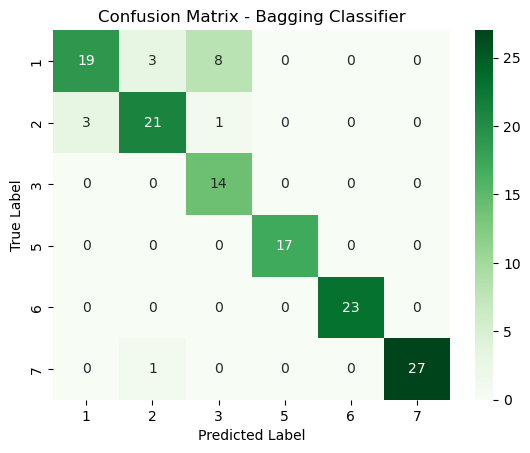

In [29]:
# 5. Bagging and Boosting Methods (for comparison)
print("\n--- 5. Bagging and Boosting Methods ---")

# Bagging
from sklearn.ensemble import BaggingClassifier
bagging_classifier = BaggingClassifier(estimator=RandomForestClassifier(n_estimators=10, random_state=42),
                                     n_estimators=10,
                                     random_state=42)
bagging_classifier.fit(X_train, y_train)
y_pred_bagging = bagging_classifier.predict(X_test)
print("\nBagging Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_bagging))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_bagging))
print("\nConfusion Matrix:")
cm_bagging = confusion_matrix(y_test, y_pred_bagging)
sns.heatmap(cm_bagging, annot=True, fmt='d', cmap='Greens',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix - Bagging Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


c:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-


AdaBoost Classifier Performance:
Accuracy: 0.4306569343065693

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        30
           2       0.00      0.00      0.00        25
           3       0.22      1.00      0.35        14
           5       0.53      1.00      0.69        17
           6       0.96      1.00      0.98        23
           7       0.71      0.18      0.29        28

    accuracy                           0.43       137
   macro avg       0.40      0.53      0.39       137
weighted avg       0.39      0.43      0.35       137


Confusion Matrix:


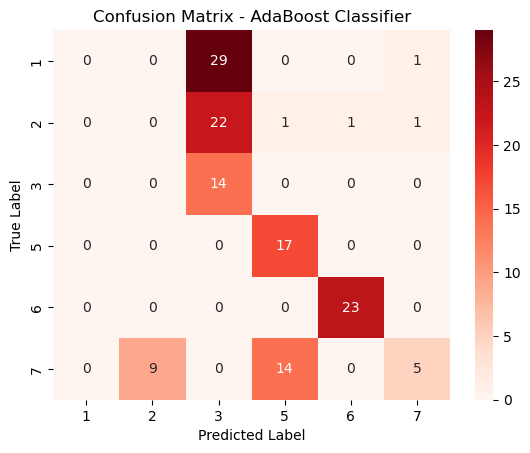

In [30]:
# Boosting (AdaBoost)
from sklearn.ensemble import AdaBoostClassifier
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_classifier.fit(X_train, y_train)
y_pred_adaboost = adaboost_classifier.predict(X_test)
print("\nAdaBoost Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_adaboost))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_adaboost))
print("\nConfusion Matrix:")
cm_adaboost = confusion_matrix(y_test, y_pred_adaboost)
sns.heatmap(cm_adaboost, annot=True, fmt='d', cmap='Reds',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix - AdaBoost Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()